<a href="https://colab.research.google.com/github/starkjones/Neural-Networks/blob/main/Simple_Neural_Network_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Simple Neural Network Exercise**
Jonathan Jones

22.06.07

## **Data Dictionary**

1. Age: age of the patient [years]

2. Sex: sex of the patient [M: Male, F: Female]

3. ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: 
Non-Anginal Pain, ASY: Asymptomatic]

4. RestingBP: resting blood pressure [mm Hg]

5. Cholesterol: serum cholesterol [mm/dl]

6. FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]

7. RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]

8. MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]

9. ExerciseAngina: exercise-induced angina [Y: Yes, N: No]

10. Oldpeak: oldpeak = ST [Numeric value measured in depression]

11. ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]

12. HeartDisease: output class [1: heart disease, 0: Normal]

In [23]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [63]:
# Import Libraries:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras
from keras.models import Sequential
from keras.layers import Dense

1. Explore and clean the data if needed

In [26]:
# Import Data:
data = '/content/drive/MyDrive/Colab Notebooks/Week 11/heart - heart.csv'

df = pd.read_csv(data)

df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [27]:
# convert column names to lower case:

df.columns = df.columns.str.lower()

In [28]:
# Duplicated rows:

df.duplicated().sum()

0

In [29]:
# Missing values:

df.isna().sum()

age               0
sex               0
chestpaintype     0
restingbp         0
cholesterol       0
fastingbs         0
restingecg        0
maxhr             0
exerciseangina    0
oldpeak           0
st_slope          0
heartdisease      0
dtype: int64

In [30]:
# Datatypes and dictionary conformity: 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             918 non-null    int64  
 1   sex             918 non-null    object 
 2   chestpaintype   918 non-null    object 
 3   restingbp       918 non-null    int64  
 4   cholesterol     918 non-null    int64  
 5   fastingbs       918 non-null    int64  
 6   restingecg      918 non-null    object 
 7   maxhr           918 non-null    int64  
 8   exerciseangina  918 non-null    object 
 9   oldpeak         918 non-null    float64
 10  st_slope        918 non-null    object 
 11  heartdisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [31]:
# Check numerical data for inconsistencies:

df.describe().round(2)

,age,restingbp,cholesterol,fastingbs,maxhr,oldpeak,heartdisease
count,918.00,918.00,918.00,918.00,918.00,918.00,918.00
mean,53.51,132.40,198.80,0.23,136.81,0.89,0.55
std,9.43,18.51,109.38,0.42,25.46,1.07,0.50
min,28.00,0.00,0.00,0.00,60.00,-2.60,0.00
25%,47.00,120.00,173.25,0.00,120.00,0.00,0.00
50%,54.00,130.00,223.00,0.00,138.00,0.60,1.00
75%,60.00,140.00,267.00,0.00,156.00,1.50,1.00
max,77.00,200.00,603.00,1.00,202.00,6.20,1.00


In [46]:
# Removing rows with no values:

rbp = df['restingbp'] == 0
chol = df['cholesterol'] == 0

dfc = df[~(rbp | chol)]

In [49]:
dfc.describe().round(2)

,age,restingbp,cholesterol,fastingbs,maxhr,oldpeak,heartdisease
count,746.00,746.00,746.00,746.00,746.00,746.00,746.00
mean,52.88,133.02,244.64,0.17,140.23,0.90,0.48
std,9.51,17.28,59.15,0.37,24.52,1.07,0.50
min,28.00,92.00,85.00,0.00,69.00,-0.10,0.00
25%,46.00,120.00,207.25,0.00,122.00,0.00,0.00
50%,54.00,130.00,237.00,0.00,140.00,0.50,0.00
75%,59.00,140.00,275.00,0.00,160.00,1.50,1.00
max,77.00,200.00,603.00,1.00,202.00,6.20,1.00


2. Perform a train-test split on your data

In [50]:
# Feature selection:
X = dfc.drop(columns = 'heartdisease')

# Target:
y = dfc['heartdisease']

# Train test split: 

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, stratify = y)

3. Use a column transformer to scale the numeric features and one-hot encode the categorical features.

In [51]:
# Scaler:
scaler = StandardScaler()

# One Hot Encoder:
OHE = OneHotEncoder(sparse = False, handle_unknown= 'ignore')

In [77]:
from sklearn.pipeline import make_pipeline
from pandas.core.arrays import categorical
from sklearn.compose import make_column_selector, make_column_transformer

# Column selection / separation by data type:

cat = make_column_selector(dtype_include= 'object')

categorical_columns = ['sex', 'chestpaintype', 'restingecg', 'exerciseangina', 'st_slope']
numeric_columns = X_train.columns.drop(categorical_columns)

# Preprocessing tuples:

categorical_tuple = (OHE, categorical_columns)
numeric_tuple = (scaler, numeric_columns)

# Column transformer:

preprocessor = make_column_transformer(numeric_tuple, categorical_tuple, remainder= 'passthrough')

# Data processing:

preprocessor.fit(X_train, y_train)

X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)


4. Define your base sequential model

In [80]:
inputshape = X_train_processed.shape[1]
inputshape

# Model instantiation:
sm = Sequential()

5. Include the number of features of each sample in your input layer

In [81]:
# First hidden layer: 
sm.add(Dense(11, activation = 'relu', input_dim = inputshape))

# Second:
sm.add(Dense(6, activation = 'relu'))

6. Use the correct activation function and the correct number of neurons for your output layer

In [82]:
# Output layer:
sm.add(Dense(1, activation = 'sigmoid'))

In [83]:
# Network Summary:

sm.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 11)                231       
                                                                 
 dense_13 (Dense)            (None, 6)                 72        
                                                                 
 dense_14 (Dense)            (None, 1)                 7         
                                                                 
Total params: 310
Trainable params: 310
Non-trainable params: 0
_________________________________________________________________


7. Compile your model with the correct loss function and an optimizer (‘adam’ is a fine choice)

In [84]:
# Accuracy used as evaluation metric:

sm.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [89]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [85]:
# Learning history plotting function:

def plot_history(history):
  """Plots the metrics of a model's learning progression or history"""

  metrics = history.history.keys()

  for metric in metrics:
    if not 'val' in metric:
      plt.plot(history.history[f'{metric}'], label = f'{metric}')
      if f'val_{metric}' in metrics:
        plt.plot(history.history[f'val_{metric}'], label = f'val_{metric}')
        plt.title(f'{metric}')
        plt.show()

9. Evaluate your models with appropriate metrics.

In [87]:
# Model fit:

history = sm.fit(X_train_processed, y_train, 
                 validation_data = (X_test_processed, y_test),
                 epochs = 100)

Epoch 1/100
18/18 [==============================] - 3s 60ms/step - loss: 0.7067 - accuracy: 0.4741 - val_loss: 0.6826 - val_accuracy: 0.5455
Epoch 2/100
18/18 [==============================] - 0s 13ms/step - loss: 0.6780 - accuracy: 0.5778 - val_loss: 0.6543 - val_accuracy: 0.6631
Epoch 3/100
18/18 [==============================] - 0s 7ms/step - loss: 0.6526 - accuracy: 0.6565 - val_loss: 0.6308 - val_accuracy: 0.7005
Epoch 4/100
18/18 [==============================] - 0s 7ms/step - loss: 0.6308 - accuracy: 0.7048 - val_loss: 0.6059 - val_accuracy: 0.7380
Epoch 5/100
18/18 [==============================] - 0s 11ms/step - loss: 0.6091 - accuracy: 0.7245 - val_loss: 0.5810 - val_accuracy: 0.7594
Epoch 6/100
18/18 [==============================] - 0s 7ms/step - loss: 0.5877 - accuracy: 0.7496 - val_loss: 0.5563 - val_accuracy: 0.7701
Epoch 7/100
18/18 [==============================] - 0s 10ms/step - loss: 0.5658 - accuracy: 0.7674 - val_loss: 0.5298 - val_accuracy: 0.7754
Epoch 8/1

8. Plot your model’s training history.

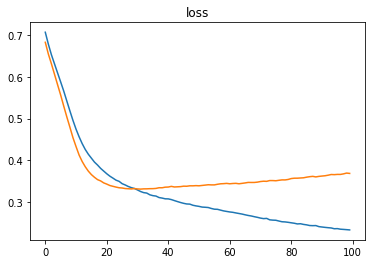

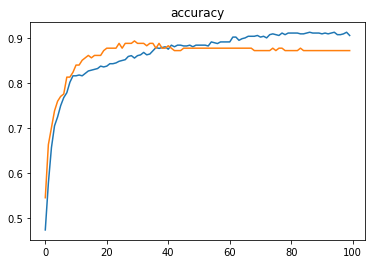

In [88]:
plot_history(history)

After you’ve created, fit, and evaluated your first model, try 2 more versions of it with different numbers of layers and neurons to see if you can create a model that scores better on the testing data.